In [73]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

In [43]:
raw_data = pd.read_csv("./data/data.csv", skiprows=[2])

In [44]:
raw_data = raw_data[raw_data["Status"] == "IP Address"]

In [45]:
raw_data.drop(
    columns=[
        "Status",
        "IPAddress",
        "RecipientLastName",
        "RecipientFirstName",
        "RecipientEmail",
        "ExternalReference",
        "LocationLatitude",
        "LocationLongitude",
        "DistributionChannel",
        "UserLanguage",
    ]
)

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,Q_RecaptchaScore,QC1,QD1,...,Q74,Q79,ST6_First Click,ST6_Last Click,ST6_Page Submit,ST6_Click Count,QS11,Q52,Q80,Q81
19,2024-01-16 05:19:14,2024-01-16 05:33:55,100,881,True,2024-01-16 05:33:56,R_72uxJTbT26KJZSJ,1,Yes,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2024-01-16 05:57:58,2024-01-16 06:07:10,100,551,True,2024-01-16 06:07:11,R_1xlLKSLVgimtnPj,0.8999999761581421,Yes,Male,...,Somewhat confident,Neither dissatisfied or satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,2024-01-16 05:58:26,2024-01-16 06:08:48,100,622,True,2024-01-16 06:08:49,R_6nZIlRrs9aUGKHL,1,Yes,Male,...,Neither confident or unsure,Dissatisfied,NaN,NaN,NaN,NaN,3rd of November,8th of November,Not confident at all,Very dissatisfied
22,2024-01-16 06:31:46,2024-01-16 06:44:03,100,736,True,2024-01-16 06:44:03,R_7PplWzAG0igeOml,1,Yes,Male,...,Somewhat confident,Neither dissatisfied or satisfied,NaN,NaN,NaN,NaN,10th of November,24th of November,Somewhat confident,Neither dissatisfied or satisfied
23,2024-01-16 05:21:40,2024-01-16 08:17:14,100,10534,True,2024-01-16 08:17:15,R_2nipTYf8mhH2Yus,0.8999999761581421,Yes,Non-binary / third gender,...,Somewhat confident,Satisfied,NaN,NaN,NaN,NaN,10th of November,24th of November,Somewhat confident,Satisfied
24,2024-01-16 09:26:32,2024-01-16 09:34:10,100,457,True,2024-01-16 09:34:11,R_1dy2jAJUx1DgK6R,0.800000011920929,Yes,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,2024-01-16 09:27:48,2024-01-16 09:36:15,100,506,True,2024-01-16 09:36:15,R_2esfOQZiXvHpgod,0.8999999761581421,Yes,Male,...,Somewhat confident,Satisfied,NaN,NaN,NaN,NaN,10th of November,29th of November,Neither confident or unsure,Dissatisfied
26,2024-01-17 03:09:03,2024-01-17 03:19:06,100,602,True,2024-01-17 03:19:06,R_2z5zMoIKEHtkx0S,0.800000011920929,Yes,Female,...,Not confident,Neither dissatisfied or satisfied,NaN,NaN,NaN,NaN,10th of November,24th of November,Confident,Very satisfied
27,2024-01-17 03:25:49,2024-01-17 03:28:42,100,173,True,2024-01-17 03:28:43,R_6QE4FQzYCk4GaNV,1,Yes,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2024-01-17 03:25:40,2024-01-17 03:33:06,100,446,True,2024-01-17 03:33:06,R_5IGX6rHpxzyVRGc,0.8999999761581421,Yes,Female,...,Not confident at all,Very dissatisfied,NaN,NaN,NaN,NaN,10th of November,24th of November,Not confident at all,Dissatisfied


In [46]:
demographics = raw_data.loc[:, :"Q_RecaptchaScore"]
# replaces Likert scale with numbers
replace_map = {
    "Satisfied": 4,
    "Very satisfied": 5,
    "Neither dissatisfied or satisfied": 3,
    "Dissatisfied": 2,
    "Very dissatisfied": 1,
    "Confident": 4,
    "Somewhat confident": 5,
    "Neither confident or unsure": 3,
    "Not confident": 2,
    "Not confident at all": 1,
}
raw_data.replace(replace_map, inplace=True)

# Make Score for User satisfaction and User Confidence
# raw_data["US"] = 0
# raw_data["UC"] = 0

complex_responses = pd.concat(
    [raw_data.loc[:, "QC1.1":"Q68"], raw_data.loc[:, "Duration (in seconds)"]], axis=1
)
simple_responses = pd.concat(
    [raw_data.loc[:, "QS1":], raw_data.loc[:, "Duration (in seconds)"]], axis=1
)

In [47]:
simple_responses.to_csv("./data/simple.csv")
complex_responses.to_csv("./data/complex.csv")

In [48]:
# Dropping time metrics as we do not have enough yet
# Dropping time metrics as we do not have enough yet
columns_to_drop = (
    list(range(5, 9)) + list(range(17, 21)) + list(range(28, 32)) + list(range(37, 41))
)

# print(simple_responses.columns)
simple_responses.drop(simple_responses.columns[columns_to_drop], axis=1, inplace=True)
complex_responses.drop(complex_responses.columns[columns_to_drop], axis=1, inplace=True)

simple_responses = simple_responses.dropna(thresh=10, axis=0)
complex_responses = complex_responses.dropna(thresh=20, axis=0)

# simple_responses.to_csv("./data/simple.csv")
# complex_responses.to_csv("./data/complex.csv")

# print(complex_responses.columns)

# simple_responses.head(20)

In [49]:
answer_sheet = pd.read_excel("./data/answer_sheet.xlsx")
answer_sheet = answer_sheet.astype(str)

In [50]:
answer_sheet.head()

,Q1.1,Q1.2,Q1.3,Q2.1,Q2.2,Q2.3,Q2.4,Q2.5,Q2.6,Q3.1,Q3.2,Q3.3,Q3.4,Q3.5,Q4.1,Q4.2,Q4.3,Q5.1,Q5.2
0,False,False,True,5,1,4,3,2,34,Executive,2,1,3,4,Q2,Febuary,January-Febuary,10th of November,24th of November


In [51]:
def calculate(question, answer, question_nr):
    score_list = []

    for _, row in question.iterrows():
        correct_answers = (row == answer.iloc[0, :]).sum()
        total_questions = len(row)
        accuracy = correct_answers / total_questions

        score_list.append({question_nr + "_Accuracy": accuracy})

    score_df = pd.DataFrame(score_list)
    return score_df

In [52]:
def calculate_scores(responses, answer_sheet, complexity):
    # Retrieve answers from answer sheet
    answer_Q1 = answer_sheet.iloc[:, 0:3]
    answer_Q2 = answer_sheet.iloc[:, 3:9]
    answer_Q3 = answer_sheet.iloc[:, 9:14]
    answer_Q4 = answer_sheet.iloc[:, 14:17]
    answer_Q5 = answer_sheet.iloc[:, 17:]

    # Retreive questions and corresponding likert responses
    question_Q1 = responses.iloc[:, 0:3]
    question_Q1.columns = ["Q1.1", "Q1.2", "Q1.3"]
    likert_Q1 = responses.iloc[:, 3:5]
    likert_Q1.columns = ["Q1_Con", "Q1_Sat"]

    question_Q2 = responses.iloc[:, 5:11]
    question_Q2.columns = ["Q2.1", "Q2.2", "Q2.3", "Q2.4", "Q2.5", "Q2.6"]
    likert_Q2 = responses.iloc[:, 11:13]
    likert_Q2.columns = ["Q2_Con", "Q2_Sat"]

    question_Q3 = responses.iloc[:, 13:18]
    question_Q3.columns = ["Q3.1", "Q3.2", "Q3.3", "Q3.4", "Q3.5"]
    likert_Q3 = responses.iloc[:, 18:20]
    likert_Q3.columns = ["Q3_Con", "Q3_Sat"]

    question_Q4 = responses.iloc[:, 20:23]
    question_Q4.columns = ["Q4.1", "Q4.2", "Q4.3"]
    likert_Q4 = responses.iloc[:, 23:25]
    likert_Q4.columns = ["Q4_Con", "Q4_Sat"]

    question_Q5 = responses.iloc[:, 25:27]
    question_Q5.columns = ["Q5.1", "Q5.2"]
    likert_Q5 = responses.iloc[:, 27:29]
    likert_Q5.columns = ["Q5_Con", "Q5_Sat"]

    duration = responses.iloc[:, 29:]
    duration.columns = ["Duration"]
    duration = pd.to_numeric(duration["Duration"])

    # Calculate score for each question using calculate function
    score_Q1 = calculate(question_Q1, answer_Q1, "Q1")
    score_Q2 = calculate(question_Q2, answer_Q2, "Q2")
    score_Q3 = calculate(question_Q3, answer_Q3, "Q3")
    score_Q4 = calculate(question_Q4, answer_Q4, "Q4")
    score_Q5 = calculate(question_Q5, answer_Q5, "Q5")

    # Combine into one file
    total = pd.concat(
        [
            score_Q1,
            likert_Q1.reset_index(drop=True),
            score_Q2,
            likert_Q2.reset_index(drop=True),
            score_Q3,
            likert_Q3.reset_index(drop=True),
            score_Q4,
            likert_Q4.reset_index(drop=True),
            score_Q5,
            likert_Q5.reset_index(drop=True),
            duration.reset_index(drop=True),
        ],
        axis=1,
    )

    total["Complexity"] = complexity

    return total

In [53]:
# complex_responses.iloc[:, 27:].head(20)

In [54]:
complex_df = calculate_scores(complex_responses, answer_sheet, "Complex")
simple_df = calculate_scores(simple_responses, answer_sheet, "Simple")


all_responses = pd.concat(
    [complex_df.reset_index(drop=True), simple_df.reset_index(drop=True)]
)

In [55]:
# simple_df.head(20)

In [56]:
all_responses.to_csv("./data/transformed/all_responses.csv")

In [57]:
all_responses.head(20)

,Q1_Accuracy,Q1_Con,Q1_Sat,Q2_Accuracy,Q2_Con,Q2_Sat,Q3_Accuracy,Q3_Con,Q3_Sat,Q4_Accuracy,Q4_Con,Q4_Sat,Q5_Accuracy,Q5_Con,Q5_Sat,Duration,Complexity
0,0.333333,3.0,4.0,0.666667,2.0,3.0,0.4,1.0,2.0,0.333333,2.0,2.0,0.5,1.0,1.0,881,Complex
1,0.666667,1.0,1.0,0.666667,1.0,1.0,0.6,4.0,5.0,0.333333,2.0,2.0,1.0,1.0,1.0,457,Complex
2,0.000000,5.0,4.0,0.333333,2.0,2.0,0.4,2.0,4.0,0.333333,3.0,3.0,0.5,1.0,2.0,173,Complex
3,0.333333,5.0,4.0,0.166667,5.0,4.0,0.6,4.0,4.0,0.333333,4.0,4.0,1.0,4.0,4.0,725,Complex
4,0.666667,2.0,4.0,0.500000,5.0,4.0,0.6,2.0,2.0,0.000000,1.0,2.0,0.0,NaN,NaN,1307,Complex
5,1.000000,5.0,4.0,0.166667,2.0,3.0,0.6,5.0,4.0,0.333333,5.0,4.0,1.0,1.0,1.0,910,Complex
6,0.666667,3.0,3.0,0.500000,4.0,5.0,0.0,3.0,3.0,0.000000,2.0,2.0,0.5,5.0,4.0,183,Complex
7,1.000000,2.0,3.0,0.000000,5.0,4.0,0.6,4.0,5.0,0.333333,5.0,4.0,1.0,4.0,4.0,5280,Complex
0,1.000000,3.0,3.0,0.500000,4.0,4.0,0.6,4.0,4.0,0.333333,5.0,3.0,0.0,NaN,NaN,551,Simple
1,0.333333,5.0,2.0,0.500000,1.0,4.0,0.6,4.0,5.0,0.333333,3.0,2.0,0.0,1.0,1.0,622,Simple


### Descriptive Statistics


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Average Accuracy, Satisfaction, Confidence, Duration by Complexity

accuracy = all_responses.iloc[:, [0, 3, 6, 9, 12, -1]]
confidence = all_responses.iloc[:, [1, 4, 7, 10, 13, -1]]
satisfaction = all_responses.iloc[:, [2, 5, 8, 11, 14, -1]]
duration = all_responses.iloc[:, [-2, -1]]

# # Accuracy
# avg_acc = accuracy.groupby(accuracy.columns[-1], as_index=False)[
#     accuracy.columns[:-1]
# ].mean()

# avg_acc["Total"] = avg_acc.mean(axis=1, numeric_only=True)

# # Confidence
# avg_con = confidence.groupby(confidence.columns[-1], as_index=False)[
#     confidence.columns[:-1]
# ].mean()

# avg_con["Total"] = avg_con.mean(axis=1, numeric_only=True)

# # Satisfaction
# avg_sat = satisfaction.groupby(satisfaction.columns[-1], as_index=False)[
#     satisfaction.columns[:-1]
# ].mean()

# avg_sat["Total"] = avg_sat.mean(axis=1, numeric_only=True)

# # Duration
# avg_dur = duration.groupby("Complexity", as_index=False)["Duration"].mean()

In [60]:
accuracy.head(20)

,Q1_Accuracy,Q2_Accuracy,Q3_Accuracy,Q4_Accuracy,Q5_Accuracy,Complexity
0,0.333333,0.666667,0.4,0.333333,0.5,Complex
1,0.666667,0.666667,0.6,0.333333,1.0,Complex
2,0.000000,0.333333,0.4,0.333333,0.5,Complex
3,0.333333,0.166667,0.6,0.333333,1.0,Complex
4,0.666667,0.500000,0.6,0.000000,0.0,Complex
5,1.000000,0.166667,0.6,0.333333,1.0,Complex
6,0.666667,0.500000,0.0,0.000000,0.5,Complex
7,1.000000,0.000000,0.6,0.333333,1.0,Complex
0,1.000000,0.500000,0.6,0.333333,0.0,Simple
1,0.333333,0.500000,0.6,0.333333,0.0,Simple


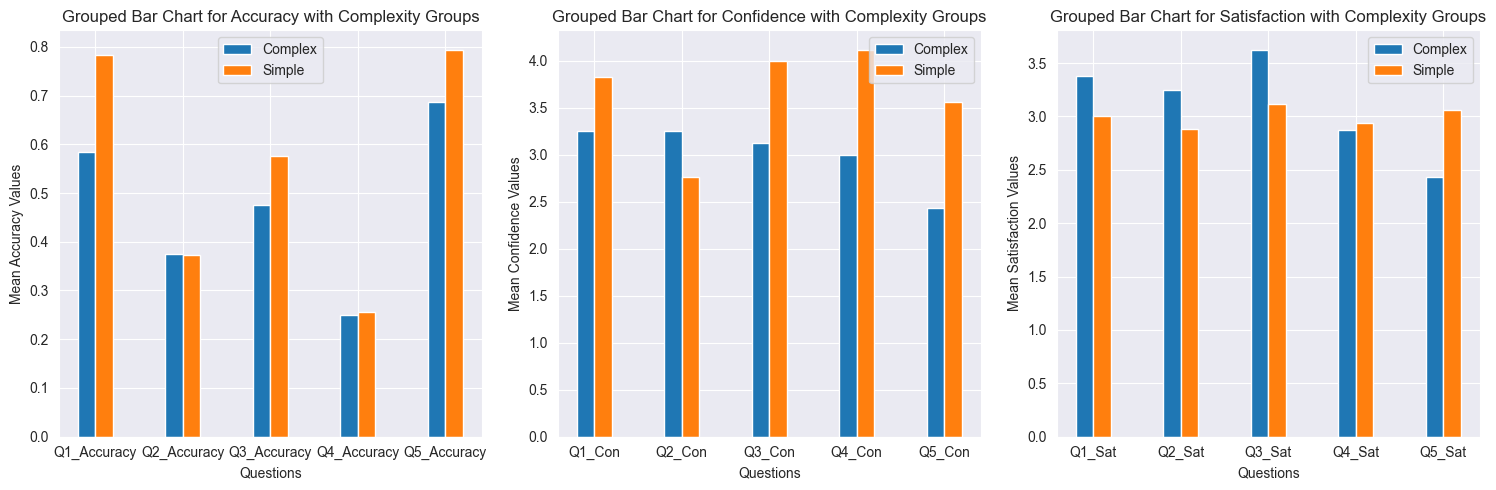

In [61]:
# List of dataframes
dfs = [accuracy, confidence, satisfaction]
variables = ["Accuracy", "Confidence", "Satisfaction"]

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, df, variable in zip(axes, dfs, variables):
    # Group by Complexity
    grouped_df = df.groupby("Complexity").mean()

    bar_width = 0.2
    bar_positions = range(len(grouped_df.columns))

    for i, (complexity, row) in enumerate(grouped_df.iterrows()):
        ax.bar(
            [pos + i * bar_width for pos in bar_positions],
            row,
            width=bar_width,
            label=complexity,
        )

    ax.set_xticks([pos + 0.5 * bar_width for pos in bar_positions])
    ax.set_xticklabels(grouped_df.columns)
    ax.legend()

    ax.set_xlabel("Questions")
    ax.set_ylabel(f"Mean {variable} Values")
    ax.set_title(f"Grouped Bar Chart for {variable} with Complexity Groups")

plt.tight_layout()
plt.show()

Distribution of Data


Index(['Q1_Accuracy', 'Q2_Accuracy', 'Q3_Accuracy', 'Q4_Accuracy',
       'Q5_Accuracy', 'Complexity'],
      dtype='object')


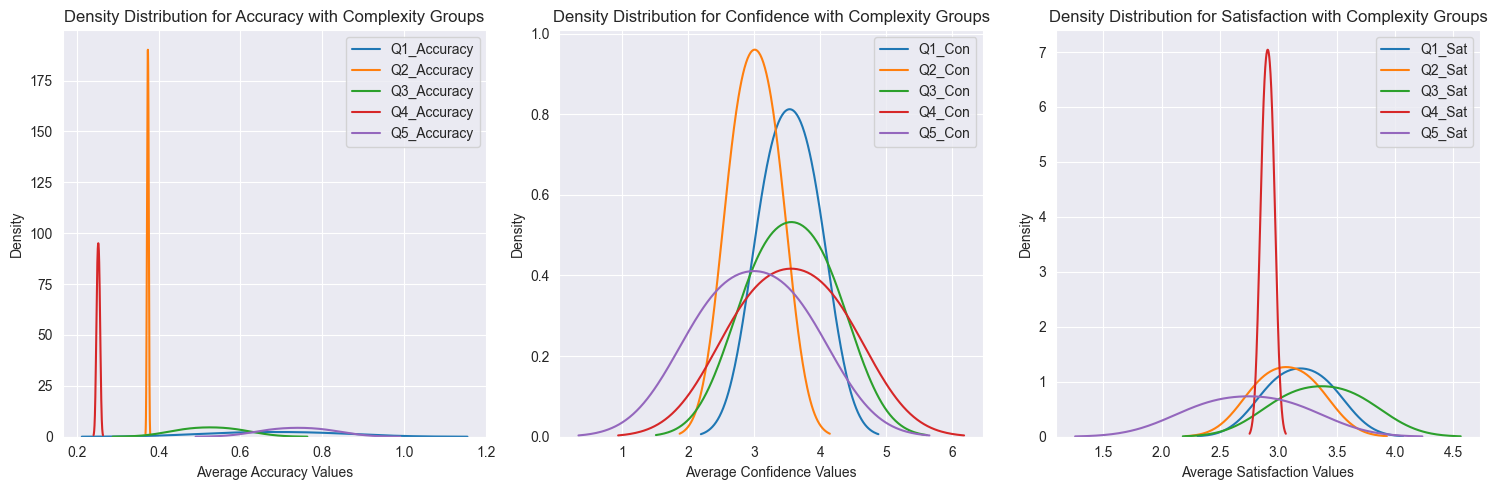

In [62]:
dfs = [accuracy, confidence, satisfaction]
variables = ["Accuracy", "Confidence", "Satisfaction"]

print(dfs[0].columns)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for ax, df, variable in zip(axes, dfs, variables):
    # Calculate average values per complexity group
    avg_values = df.groupby("Complexity").mean()

    # Plot density distribution for each complexity group
    for column in avg_values.columns:
        sns.kdeplot(data=avg_values[column], ax=ax, label=column)

    ax.set_xlabel(f"Average {variable} Values")
    ax.set_ylabel("Density")
    ax.legend()
    ax.set_title(f"Density Distribution for {variable} with Complexity Groups")

plt.tight_layout()
plt.show()

Measureing Dependency


In [63]:
accuracy["Total"] = accuracy.mean(axis=1, numeric_only=True)

confidence["Total"] = confidence.mean(axis=1, numeric_only=True)

satisfaction["Total"] = satisfaction.mean(axis=1, numeric_only=True)

combined_df = pd.DataFrame(
    {
        "Accuracy": accuracy["Total"],
        "Confidence": confidence["Total"],
        "Satisfaction": satisfaction["Total"],
        "Duration": all_responses["Duration"],
        "Complexity": all_responses["Complexity"]
    }
)

/var/folders/7x/5gb8chh95qv0_4nmtt6qn1000000gn/T/ipykernel_4908/97630355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accuracy["Total"] = accuracy.mean(axis=1, numeric_only=True)
/var/folders/7x/5gb8chh95qv0_4nmtt6qn1000000gn/T/ipykernel_4908/97630355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confidence["Total"] = confidence.mean(axis=1, numeric_only=True)
/var/folders/7x/5gb8chh95qv0_4nmtt6qn1000000gn/T/ipykernel_4908/97630355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a

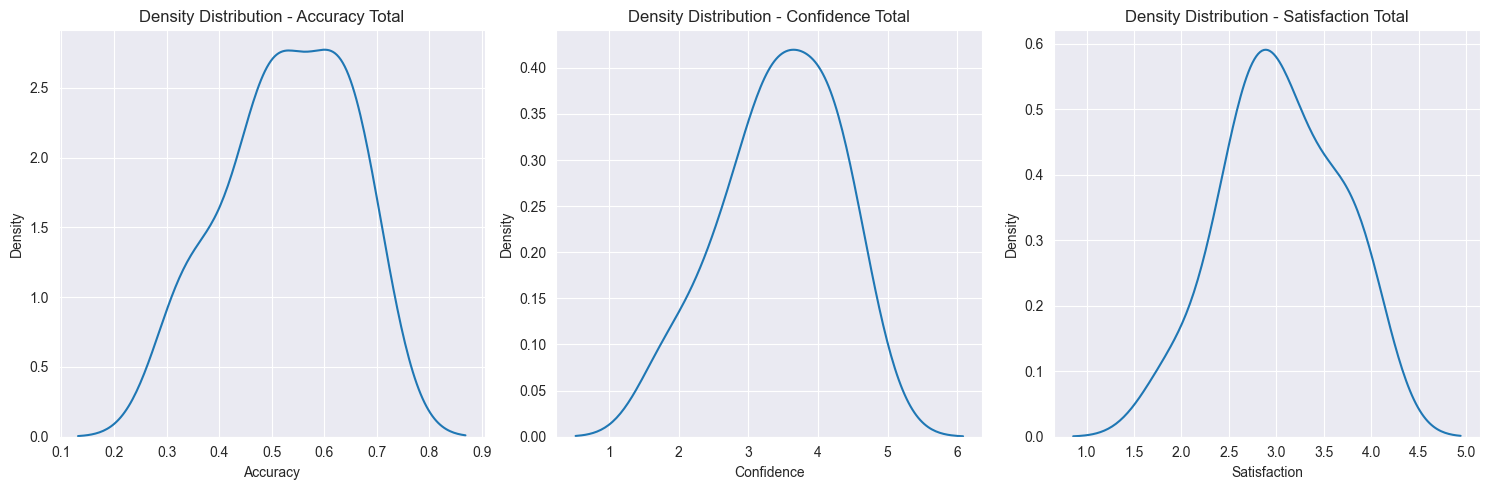

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Density Distribution for Accuracy Total
sns.kdeplot(data=combined_df["Accuracy"], ax=axes[0], label="Accuracy")
axes[0].set_title("Density Distribution - Accuracy Total")

# Density Distribution for Confidence Total
sns.kdeplot(data=combined_df["Confidence"], ax=axes[1], label="Confidence")
axes[1].set_title("Density Distribution - Confidence Total")

# Density Distribution for Satisfaction Total
sns.kdeplot(data=combined_df["Satisfaction"], ax=axes[2], label="Satisfaction")
axes[2].set_title("Density Distribution - Satisfaction Total")

plt.tight_layout()
plt.show()

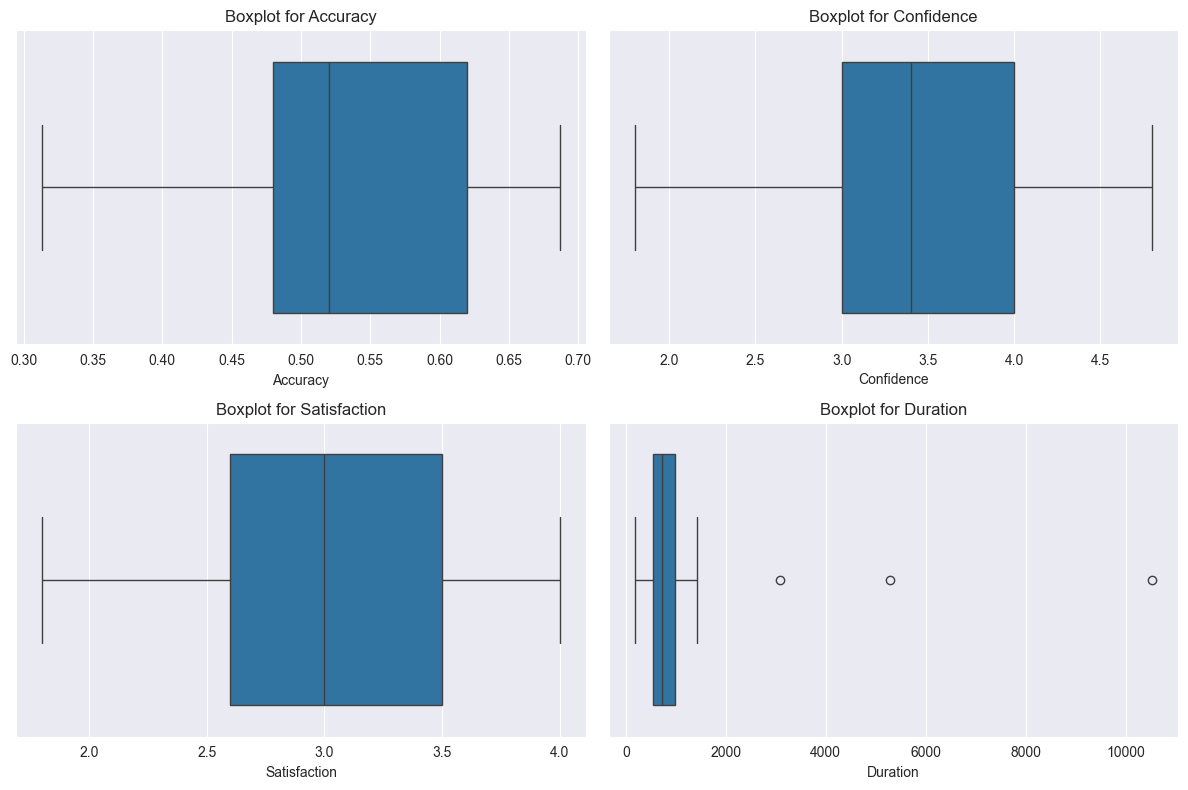

In [65]:
# Create boxplots for each variable
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=combined_df["Accuracy"])
plt.title("Boxplot for Accuracy")

plt.subplot(2, 2, 2)
sns.boxplot(x=combined_df["Confidence"])
plt.title("Boxplot for Confidence")

plt.subplot(2, 2, 3)
sns.boxplot(x=combined_df["Satisfaction"])
plt.title("Boxplot for Satisfaction")

plt.subplot(2, 2, 4)
sns.boxplot(x=combined_df["Duration"])
plt.title("Boxplot for Duration")

plt.tight_layout()
plt.show()

In [66]:
duration_stats = combined_df["Duration"].describe()

# Calculate interquartile range (IQR)
Q1 = duration_stats["25%"]
Q3 = duration_stats["75%"]
IQR = Q3 - Q1

# Define lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
combined_df_no_outliers = combined_df[
    (combined_df["Duration"] >= lower_bound) & (combined_df["Duration"] <= upper_bound)
]

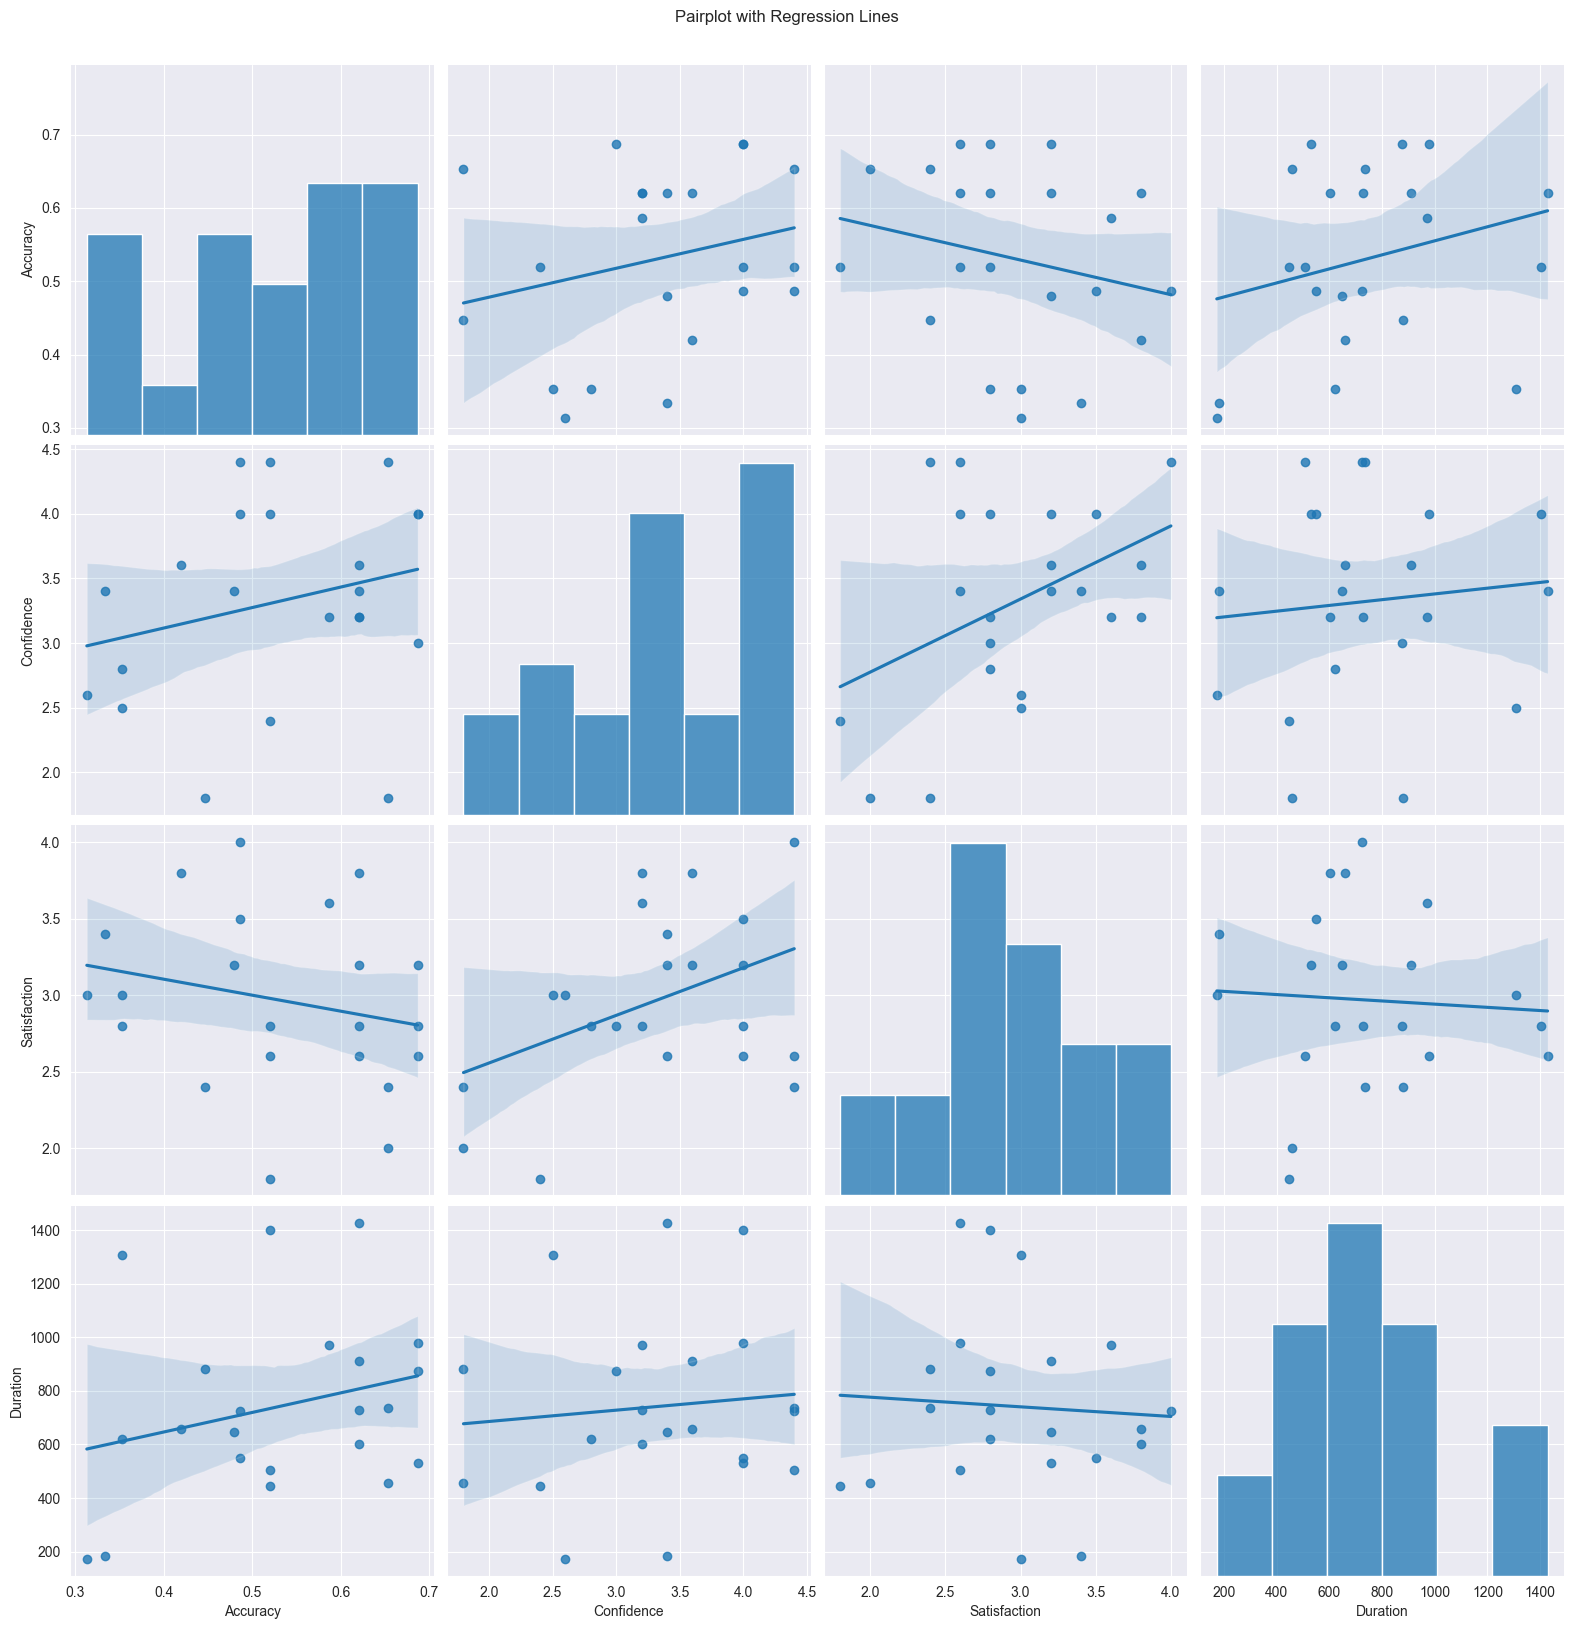

In [67]:
# Create a pairplot with regression lines
sns.pairplot(combined_df_no_outliers, kind="reg", height=4)
plt.suptitle("Pairplot with Regression Lines", y=1.02)
plt.show()

/var/folders/7x/5gb8chh95qv0_4nmtt6qn1000000gn/T/ipykernel_4908/2621211977.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = combined_df.corr(method="pearson")
/var/folders/7x/5gb8chh95qv0_4nmtt6qn1000000gn/T/ipykernel_4908/2621211977.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_corr = combined_df.corr(method="spearman")


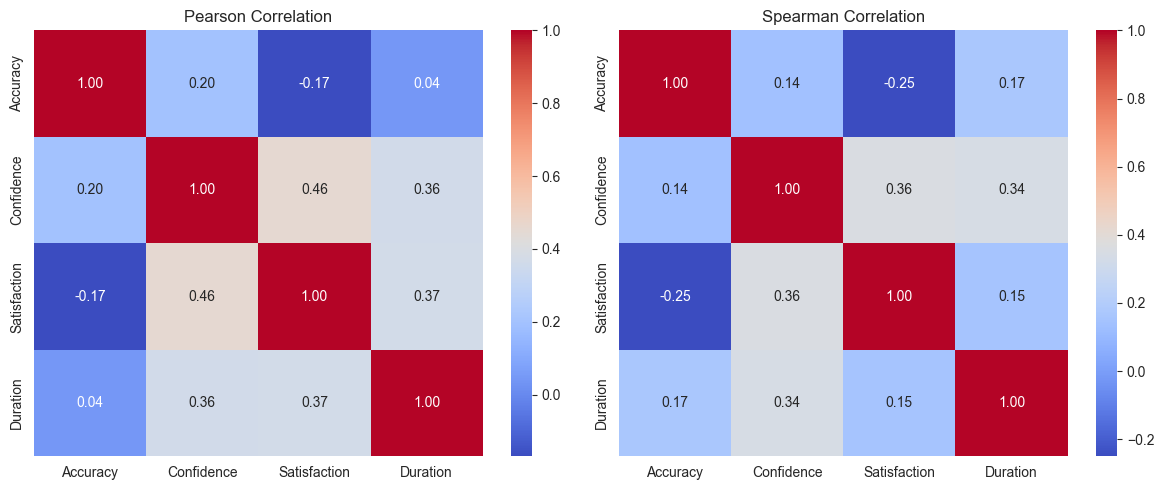

In [68]:
pearson_corr = combined_df.corr(method="pearson")
spearman_corr = combined_df.corr(method="spearman")

# Create subplots for heatmaps
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Pearson Correlation Heatmap
sns.heatmap(pearson_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Pearson Correlation")

# Spearman Correlation Heatmap
sns.heatmap(spearman_corr, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Spearman Correlation")

plt.tight_layout()
plt.show()

In [69]:
# Calculate User confidence for simple visualizations
simple_responses["UC"] = (
    simple_responses["Q73"]
    + simple_responses["Q76"]
    + simple_responses["Q78"]
    + simple_responses["Q74"]
    + simple_responses["Q80"]
) / 25
# Calculate User satisfaction for simple visualization
simple_responses["US"] = (
    simple_responses["Q72"]
    + simple_responses["Q75"]
    + simple_responses["Q77"]
    + simple_responses["Q79"]
    + simple_responses["Q81"]
) / 25

# Calculate User confidence for complex visualizations
complex_responses["UC"] = (
    complex_responses["QUC1"]
    + complex_responses["Q61"]
    + complex_responses["Q63"]
    + complex_responses["Q65"]
    + complex_responses["Q67"]
) / 25
# Calculate User satisfaction for complex visualization
complex_responses["US"] = (
    complex_responses["QUS1"]
    + complex_responses["Q62"]
    + complex_responses["Q64"]
    + complex_responses["Q66"]
    + complex_responses["Q68"]
) / 25

# show result for simple and complex results
complex_responses[["US", "UC"]]

,US,UC
19,0.48,0.36
24,0.40,0.36
27,0.60,0.52
30,0.80,0.88
31,NaN,NaN
37,0.64,0.72
40,0.68,0.68
47,0.80,0.80


In [70]:
simple_responses[["US", "UC"]]

,US,UC
20,NaN,NaN
21,0.56,0.56
22,0.48,0.88
23,0.76,0.88
25,0.52,0.88
26,0.76,0.64
28,0.36,0.48
29,0.56,0.80
32,0.64,0.80
34,0.52,0.80


In [71]:
# t-test user-satisfaction

simple_responses =  combined_df[combined_df['Complexity'] == 'Simple']
complex_responses = combined_df[combined_df['Complexity'] == 'Complex']
t_statistic_us, p_value_us = ttest_ind(simple_responses['Satisfaction'],complex_responses['Satisfaction'], nan_policy='omit')

# t-test user-confidence
t_statistic_uc, p_value_uc = ttest_ind(simple_responses['Confidence'],complex_responses['Confidence'], nan_policy='omit')

# t-test user-confidence
simple_responses['Duration'] = simple_responses['Duration'].astype(int)
complex_responses['Duration'] = complex_responses['Duration'].astype(int)
t_statistic_du, p_value_du = ttest_ind(simple_responses['Duration'],complex_responses['Duration'], nan_policy='omit', equal_var = False)

t_statistic_dm, p_value_dm = ttest_ind(simple_responses['Accuracy'],complex_responses['Accuracy'], nan_policy='omit', equal_var = False)

# combined_df = pd.DataFrame(
#     {
#         "Accuracy": accuracy["Total"],
#         "Confidence": confidence["Total"],
#         "Satisfaction": satisfaction["Total"],
#         "Duration": all_responses["Duration"],
#     }
# )


#Adjust for left-tailed test
one_tailed_p_value = p_value_du / 2

print(t_statistic_us, p_value_us)
print(t_statistic_uc, p_value_uc)
print(t_statistic_du, one_tailed_p_value)
print(t_statistic_dm, p_value_dm)


-0.4574341724408947 0.6516506948836052
1.9525212617468928 0.06315199388034998
0.2978621060914488 0.3844974762228401
1.5438359477856767 0.15177933053084766


/var/folders/7x/5gb8chh95qv0_4nmtt6qn1000000gn/T/ipykernel_4908/559006642.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  simple_responses['Duration'] = simple_responses['Duration'].astype(int)
/var/folders/7x/5gb8chh95qv0_4nmtt6qn1000000gn/T/ipykernel_4908/559006642.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complex_responses['Duration'] = complex_responses['Duration'].astype(int)


In [75]:

t_statistic_us, p_value_us = mannwhitneyu(simple_responses['Satisfaction'],complex_responses['Satisfaction'], nan_policy='omit')

# t-test user-confidence
t_statistic_uc, p_value_uc = mannwhitneyu(simple_responses['Confidence'],complex_responses['Confidence'], nan_policy='omit')

t_statistic_du, p_value_du = mannwhitneyu(simple_responses['Duration'],complex_responses['Duration'], nan_policy='omit')

t_statistic_dm, p_value_dm = mannwhitneyu(simple_responses['Accuracy'],complex_responses['Accuracy'], nan_policy='omit')

one_tailed_p_value = p_value_du / 2

print(t_statistic_us, p_value_us)
print(t_statistic_uc, p_value_uc)
print(t_statistic_du, one_tailed_p_value)
print(t_statistic_dm, p_value_dm)


57.5 0.5580676502032148
93.0 0.15033224253235292
76.0 0.33436146360631486
94.0 0.13581908067360432


In [77]:
print(combined_df.shape[0])

25
